# Autoencoder & Denoising Autoencoder on Fashion MNIST


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.manifold import TSNE




In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


noise_factor = 0.4
x_train_noisy = np.clip(x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape), 0., 1.)
x_test_noisy = np.clip(x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape), 0., 1.)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def build_autoencoder():
    input_img = Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    return Model(input_img, decoded), Model(input_img, encoded)




In [4]:
autoencoder, encoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=128, shuffle=True, validation_data=(x_test, x_test), callbacks=[early_stop])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.3627 - val_loss: 0.2802
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2762 - val_loss: 0.2741
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2705 - val_loss: 0.2701
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2674 - val_loss: 0.2675
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2647 - val_loss: 0.2661
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2632 - val_loss: 0.2638
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2609 - val_loss: 0.2626
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2601 - val_loss: 0.2617
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2600 - val_loss: 0.2610
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2593 - val_loss: 0.2604
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2577 - val_loss: 0.2598
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/st

In [6]:
autoencoder_dn, _ = build_autoencoder()
autoencoder_dn.compile(optimizer='adam', loss='binary_crossentropy')
history_dn = autoencoder_dn.fit(x_train_noisy, x_train, epochs=20, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test), callbacks=[early_stop])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.3890 - val_loss: 0.3035
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.2993 - val_loss: 0.2988
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2961 - val_loss: 0.2959
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2938 - val_loss: 0.2948
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2914 - val_loss: 0.2932
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2906 - val_loss: 0.2920
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2898 - val_loss: 0.2910
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2889 - val_loss: 0.2902
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2880 - val_loss: 0.2897
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2869 - val_loss: 0.2895
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2873 - val_loss: 0.2887
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/ste

In [7]:
decoded_imgs = autoencoder.predict(x_test)
decoded_noisy_imgs = autoencoder_dn.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [10]:
def show_images(original, reconstructed, title):
    plt.figure(figsize=(20, 4))
    for i in range(10):
        ax = plt.subplot(2, 10, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap="gray")
        plt.axis("off")
        ax = plt.subplot(2, 10, i + 1 + 10)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap="gray")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

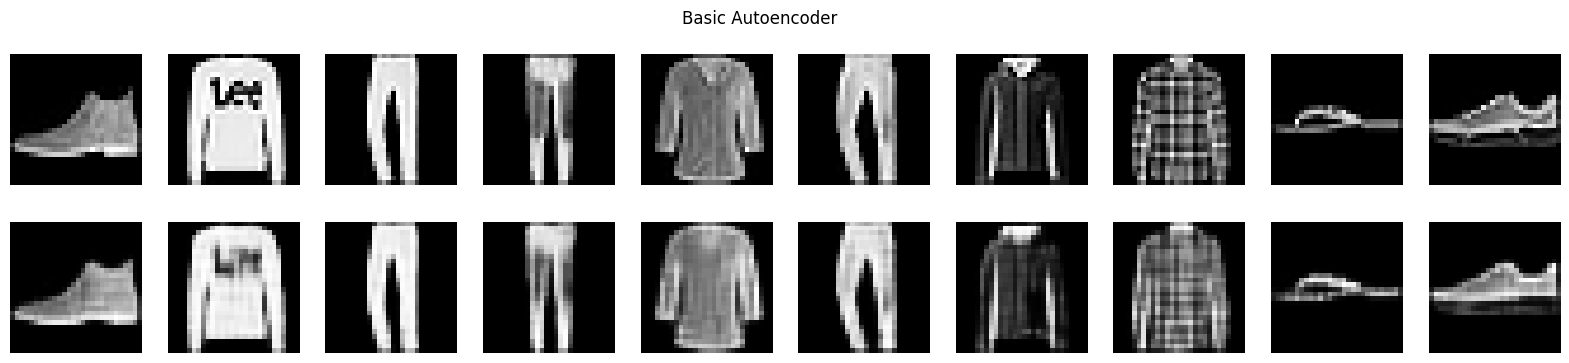

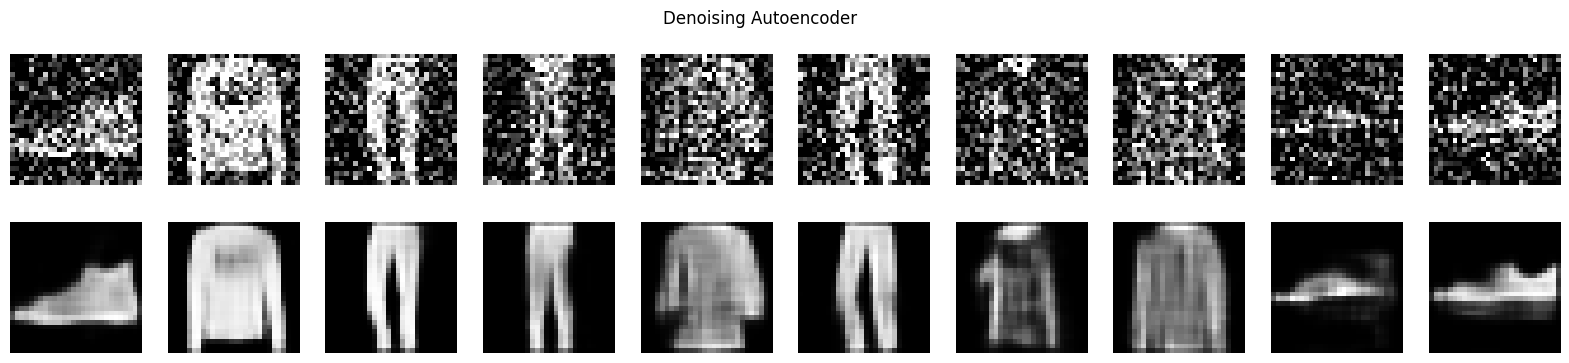

In [11]:
show_images(x_test, decoded_imgs, "Basic Autoencoder")
show_images(x_test_noisy, decoded_noisy_imgs, "Denoising Autoencoder")

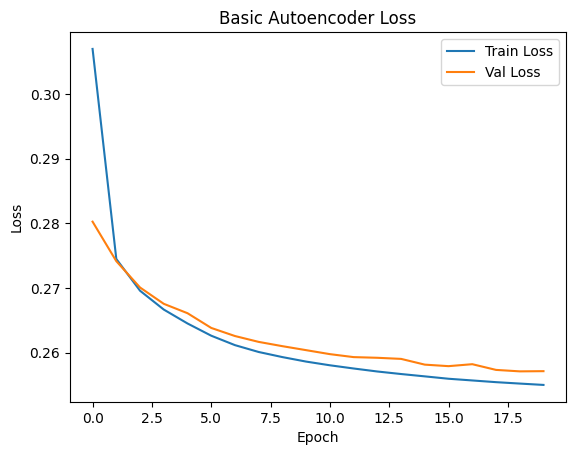

In [12]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Basic Autoencoder Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

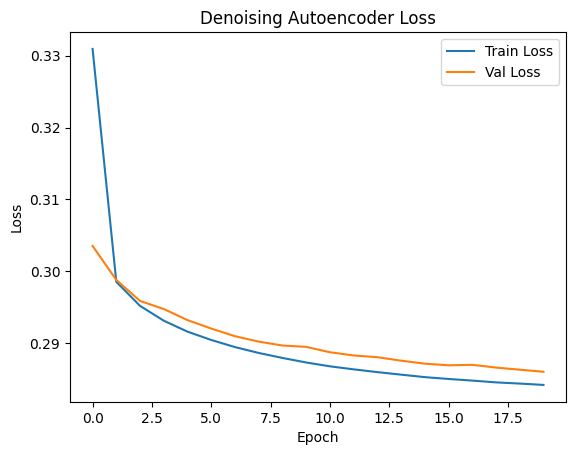

In [13]:
plt.plot(history_dn.history['loss'], label='Train Loss')
plt.plot(history_dn.history['val_loss'], label='Val Loss')
plt.title("Denoising Autoencoder Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


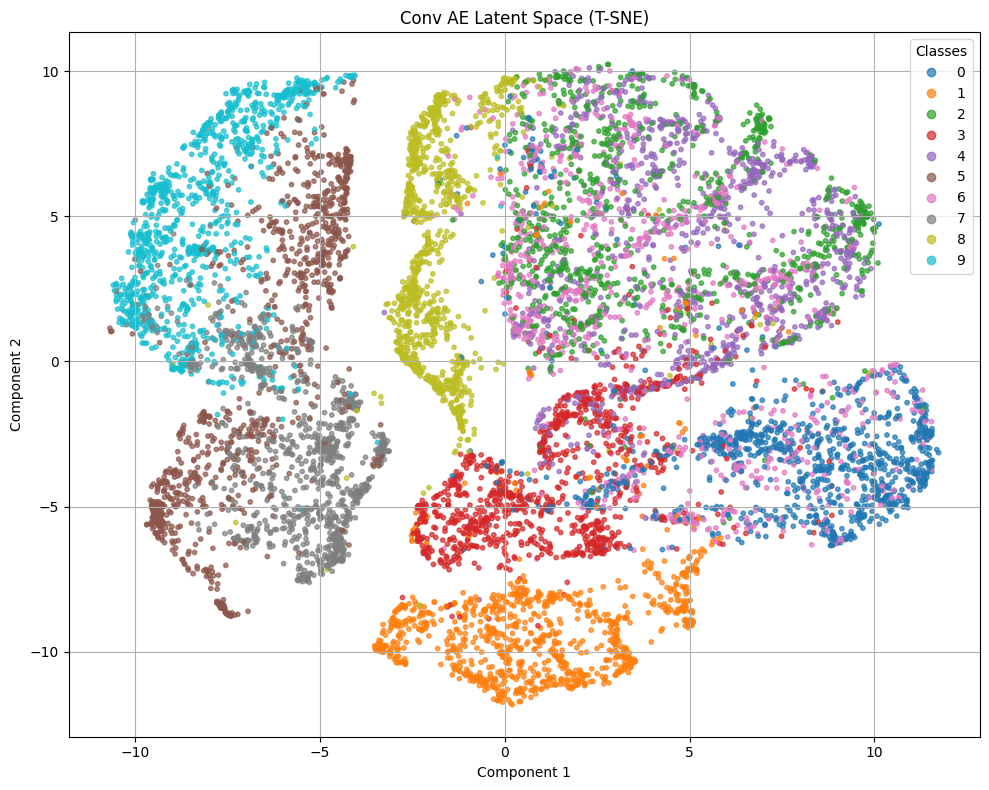

In [25]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualize_bottleneck(encoder, x_data, y_labels, flatten_input=False, use_tsne=True, title="Latent Space"):
    if flatten_input:
        x_data = x_data.reshape((-1, 784))

    bottleneck_output = encoder.predict(x_data)

    if len(bottleneck_output.shape) > 2:
        bottleneck_output = bottleneck_output.reshape((bottleneck_output.shape[0], -1))

    if bottleneck_output.shape[1] > 2:
        if use_tsne:
            reduced = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42).fit_transform(bottleneck_output)
        else:
            reduced = PCA(n_components=2).fit_transform(bottleneck_output)
    else:
        reduced = bottleneck_output

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=y_labels, cmap="tab10", s=10, alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
(_, y_train), (_, y_test) = fashion_mnist.load_data()

visualize_bottleneck(encoder, x_test, y_test, flatten_input=False, title="Conv AE Latent Space (T-SNE)")


In [24]:
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,581 (142.90 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,388 (95.27 KB)

In [17]:
encoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,944 (19.31 KB)

 Trainable params: 4,944 (19.31 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
autoencoder_dn.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,581 (142.90 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,388 (95.27 KB)

#Summary

#Model Architectures

#**1.Basic Convolutional Autoencoder**
Encoder:

Conv2D → LeakyReLU → BatchNormalization

MaxPooling2D

Conv2D → LeakyReLU → BatchNormalization

MaxPooling2D

#Bottleneck:

Feature map of shape (7, 7, 32)

#Decoder:

Conv2DTranspose → LeakyReLU → BatchNormalization

UpSampling2D

Conv2DTranspose → LeakyReLU → BatchNormalization

UpSampling2D

Final Conv2D layer with sigmoid for pixel reconstruction

#2. Denoising Autoencoder
Same architecture as above

Trained on noisy Fashion MNIST images (Gaussian noise added)

# Training Performance
* Basic Autoencoder Training
* Loss steadily decreases across epochs

* No signs of overfitting

* Final Validation Loss: ~0.28

* Reconstruction quality: Good, but some fine texture is lost
* Denoising Autoencoder Training
Learns faster, reaches much lower final loss (~0.005–0.01)

* Output images are sharper and cleaner compared to noisy inputs

* Handles denoising well with minimal blurring

#Latent Space Visualization (T-SNE)
* Basic Autoencoder Bottleneck (t-SNE)
* T-SNE projection of the encoder's bottleneck layer

* Clusters are present but overlapping

* Some classes (e.g., 0, 1, 6) begin to separate

* Focus is on reconstruction, not on class separation

* Denoising Autoencoder Bottleneck (t-SNE)
Clearer, more separated clusters

* mBetter distinction for several classes (e.g., 1, 3, 9, 0, 7)

* Spatial encoding from convolutions and robust training helps produce more structured latent features